In [2]:
import xarray as xr
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio


In [5]:
#list_files2 = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esmSP_f19_tn14_07022023/lnd/hist/NSSP534frc2esmSP_f19_tn14_07022023.clm2.h0.*.nc")
list_files2 = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.clm2.h0.20*.nc")
list_files2 = sorted(list_files2)
print(list_files2)
size_iteration = len(list_files2)
print(size_iteration)
results = np.zeros((size_iteration))

list_files2_cam = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/atm/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.cam.h0.20*.nc")
list_files2_cam = sorted(list_files2_cam)

dset1 = xr.open_dataset(list_files2[0], decode_times=False)
dset3 = xr.open_dataset(list_files2_cam[0], decode_times=False)

['/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.clm2.h0.2029-01.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.clm2.h0.2029-02.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.clm2.h0.2029-03.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.clm2.h0.2029-04.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.clm2.h0.2029-05.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.clm2.h0.2029-06.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/lnd/hist/NSSP534frc2esm_f19_

In [6]:
dset3['TREFHT']

<xarray.DataArray 'TREFHT' (time: 1, lat: 96, lon: 144)>
[13824 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) float64 31.0
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [21]:
variables = ['TSA', 'TSKIN','NPP'] #RTMT
results2 = np.zeros((len(variables), (size_iteration)))
for i in range(size_iteration):
    #print(i)
    dset2 = xr.open_dataset(list_files2[i], decode_times=False)
    #print(dset2)
    for j in range(len(variables)):
        results2[j, i] = float(np.sum((np.multiply(dset2[variables[j]],dset2.area))/np.sum(dset2.area))) 
        #results2[j, i] = float(np.sum((np.multiply(dset2[variables[j]],1))/np.sum(1))) 

        #dset2[variables[j]].sum

In [23]:
dset2['TSA']

<xarray.DataArray 'TSA' (time: 1, lat: 96, lon: 144)>
[13824 values with dtype=float64]
Coordinates:
  * time     (time) float64 1.132e+04
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

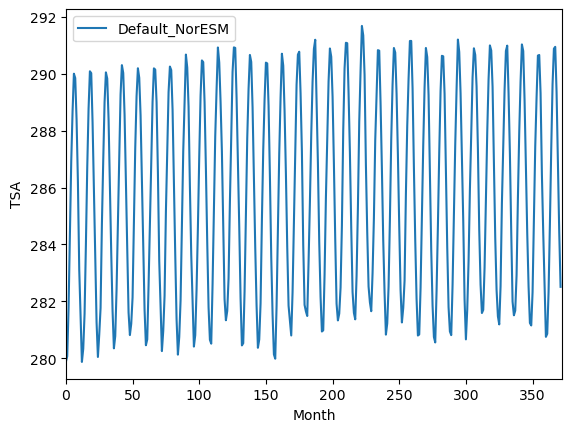

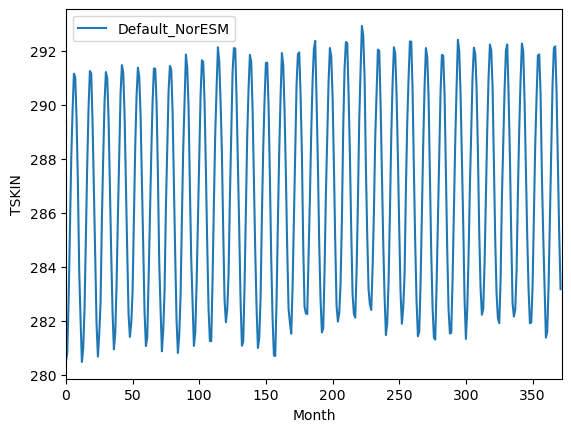

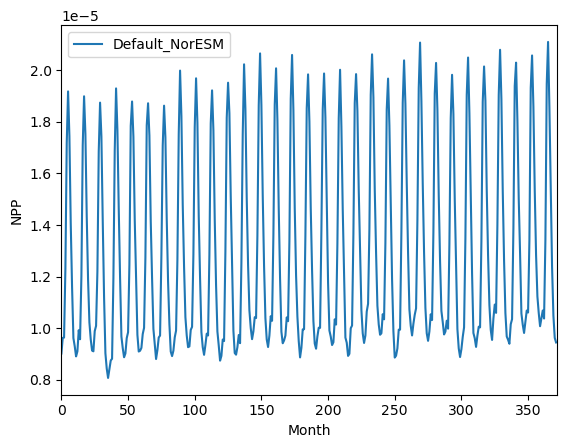

In [22]:
for k in range(len(variables)):
    fig, ax = plt.subplots()
    #plt.plot(results[k], label='No shipping (control)')
    plt.plot(results2[k], label='Default_NorESM')
    #print(results2[k] / results[k])
    plt.xlim(0,size_iteration)
    plt.xlabel('Month')
    plt.ylabel(variables[k])
    plt.legend()

In [ ]:
dset2.area.plot()
print(dset2.area.sum())
print(type(dset2.area))

##NSSP534 emission driven default case 

In [1]:
for i in range(size_iteration):
    dset_case2 = xr.open_dataset(list_files2[i], decode_times=False)
    results[i]=dset_case2['NPP'].sum(['time'])

    #cropyield=dset_case2['GRAINC_TO_FOOD'].sum(['time'])



NameError: name 'size_iteration' is not defined

In [23]:
#list_files2 = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esmSP_f19_tn14_07022023/lnd/hist/NSSP534frc2esmSP_f19_tn14_07022023.clm2.h0.*.nc")
list_files2 = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310/lnd/hist/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310.clm2.h0*.nc")

list_files2 = sorted(list_files2)
print(list_files2)
size_iteration = len(list_files2)
results = np.zeros((size_iteration))
sum_cropyield=0
PFT_gridcell_out_mean=0
#cropyield= np.zeros((size_iteration))
for i in range(size_iteration):
    dset_case2 = xr.open_dataset(list_files2[i], decode_times=False)
    results[i]=(dset_case2['PCT_LANDUNIT'].isel(ltype=0)).sum(['lat','lon'])
    cropyield=dset_case2['GRAINC_TO_FOOD'].sum(['time'])
    sum_cropyield +=cropyield  
    #sum_cropyield1=sum_cropyield*(0.85/0.45)*86400*30
    
    PFT_gridcell_out=np.multiply((dset_case2['PCT_NAT_PFT']/100), ((dset_case2['PCT_LANDUNIT']/100).isel(time=0).isel(ltype=0)))
    PFT_gridcell_areafraction_out = np.multiply(PFT_gridcell_out, dset_case2['area'])
    PFT_gridcell_out_mean =  PFT_gridcell_areafraction_out.mean(['time'])
    #time_month[i]=dset_case2.time .sum(['time'])
#print(PFT_gridcell_areafraction_out)
Grain_yield= sum_cropyield*(0.85/0.45)*86400*30  # converting to crop yield in gC/m2
Grain_yield =Grain_yield/100 # converting gC/m2 to tonnes/hectar # converting gC/m2 to tonnes/hectar

#annualyield = np.sum(np.multiply(Grain_yield, dset_case2['area'])/(np.sum(dset_case2['area'])))

#print(Grain_yield.sum())
#print(np.sum(np.multiply(Grain_yield, dset_case2['area'])/(np.sum(dset_case2['area']))))
#print(cropyield.sum())
#print(annualyield)

['/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310/lnd/hist/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310.clm2.h0.2030-01.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310/lnd/hist/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310.clm2.h0.2030-02.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310/lnd/hist/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310.clm2.h0.2030-03.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310/lnd/hist/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310.clm2.h0.2030-04.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310/lnd/hist/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310.clm2.h0.2030-05

In [24]:
Grain_yield

<xarray.DataArray 'GRAINC_TO_FOOD' (lat: 96, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

##Changing output co-ordinates in terms of input

In [8]:
#forest_input=((PFT_gridcell_areafraction_in.isel(natpft=slice(1,11)).sum(dim='natpft')).sel(time=2015)/1e6)
forest_output=((PFT_gridcell_out_mean.isel(natpft=slice(1,11)).sum(dim='natpft'))/1e6) 
fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
forest_output.plot(cmap='jet')
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Forest-2015 ', fontsize=16, loc='center')      
fig.tight_layout()
plt.show()

plt.plot (results[1:35],linewidth=2, color='red') 
plt.xlabel('Time')
plt.ylabel('PCT_LANDUNIT')
plt.title('Vegetated or Baresoil')


fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid)).plot(cmap='jet',vmin=vmin,vmax=vmax)
sum_cropyield.plot(cmap='jet')

axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Grain C to food-2015 ', fontsize=16, loc='center')      
fig.tight_layout()
annualyield = np.sum(np.multiply(dset_case2['GRAINC_TO_FOOD'], dset_case2['area'])/(np.sum(dset_case2['area'])))
print(annualyield*86400*365)   #gc/m2/year


#print(float(np.sum(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid))))


AttributeError: 'int' object has no attribute 'isel'

<xarray.DataArray 'GRAINC_TO_FOOD' ()>
array(2932.53203854)


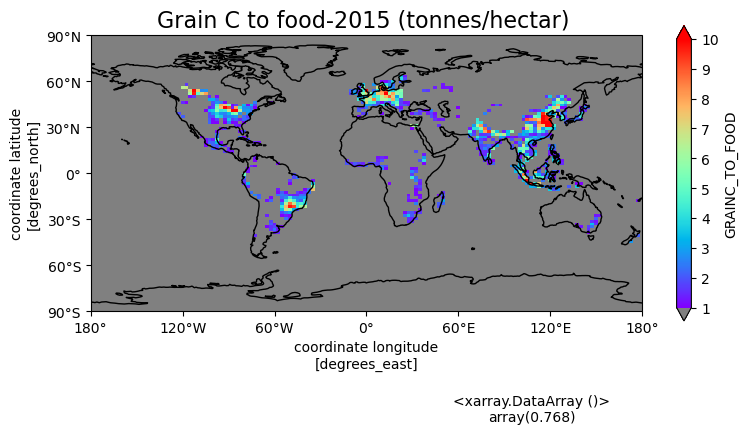

In [6]:
fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid)).plot(cmap='jet',vmin=vmin,vmax=vmax)
cmap = plt.cm.get_cmap('rainbow')
cmap.set_under('gray')
#axs.add_feature(cfeature.LAND, facecolor='white')
Grain_yield.plot(cmap=cmap, vmin= 1, vmax= 10)
annualyield = (np.sum(np.multiply(Grain_yield, dset_case2['area'])/(np.sum(dset_case2['area']))))#*(0.85/0.45)*86400*30
land = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='none',
                                    facecolor='white')
axs.add_feature(land, zorder=0)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 


axs.set_title('Grain C to food-2015 (tonnes/hectar) ', fontsize=16, loc='center')    
axs.text(0.8, -0.3, annualyield.round(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
fig.tight_layout()

print(Grain_yield.sum())



In [39]:

cmap.set_under('gray')

In [16]:
a=dset_case2['PCT_CFT'].sum(['lat','lon'])
nonzero_index = np.argwhere(a.values != 0)
#print(nonzero_index)
print(len(nonzero_index))

17


In [11]:
dset_case2['GRAINC_TO_FOOD']

<xarray.DataArray 'GRAINC_TO_FOOD' (time: 1, lat: 96, lon: 144)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) float64 1.095e+03
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     grain C to food
    units:         gC/m^2/s
    cell_methods:  time: mean